In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("notebook")

In [2]:
class ContinuousUniformRandomVariable:
    def __init__(self, a = 0, b = 1):
        self.low = a
        self.high = b
        
    def draw(self, n_samples):
        samples = np.random.uniform(self.low, self.high, n_samples)
        return samples

In [5]:
Zufallspunkt = ContinuousUniformRandomVariable(0, 1)
Zufallspunkt.draw(10)

array([8.39813172e-01, 5.49272332e-01, 5.21438301e-01, 4.43743894e-01,
       7.68341380e-01, 6.89717478e-01, 4.20834674e-01, 2.83450038e-01,
       1.04094552e-04, 4.95398079e-01])

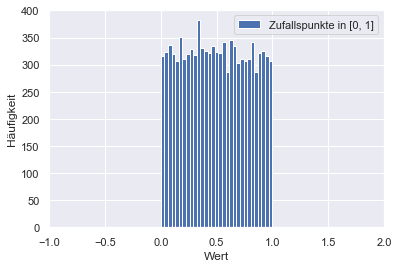

In [6]:
n_draws = 10000
sample = Zufallspunkt.draw(n_draws)
plt.hist(sample, bins = int(1 + 3.3*np.log(n_draws)))
plt.xlabel("Wert")
plt.xlim(Zufallspunkt.low - 1, Zufallspunkt.high + 1)
plt.ylabel("Häufigkeit")
plt.legend([f"Zufallspunkte in [{Zufallspunkt.low}, {Zufallspunkt.high}]"]);

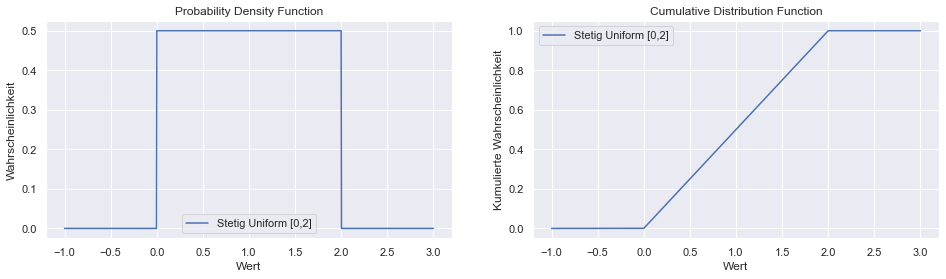

In [29]:
from scipy.stats import uniform

a = 0
b = 2
x = np.linspace(a - 1, b + 1, 1000)

plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
y_pdf = uniform.pdf(x, a, b)
plt.plot(x, y_pdf, label = f"Stetig Uniform [{a},{b}]")
plt.ylabel("Wahrscheinlichkeit")
plt.xlabel("Wert")
plt.title("Probability Density Function")
plt.legend();

plt.subplot(1, 2, 2)
y_cdf = uniform.cdf(x, a, b)
plt.plot(x, y_cdf, label = f"Stetig Uniform [{a},{b}]")
plt.ylabel("Kumulierte Wahrscheinlichkeit")
plt.xlabel("Wert")
plt.title("Cumulative Distribution Function")
plt.legend();

In [8]:
class NormalRandomVariable:
    def __init__(self, mu = 0, sigma = 1):
        self.mu = mu
        self.sigma = sigma
        
    def draw(self, n_samples):
        samples = np.random.normal(self.mu, self.sigma, n_samples)
        return samples

In [9]:
Zufallspunkt = NormalRandomVariable(0, 2)
Zufallspunkt.draw(10)

array([-2.0051888 , -0.00987536,  0.6156209 , -1.76968564, -3.32723347,
       -4.40873624,  0.03972506,  1.95056559,  4.23542612,  2.2542112 ])

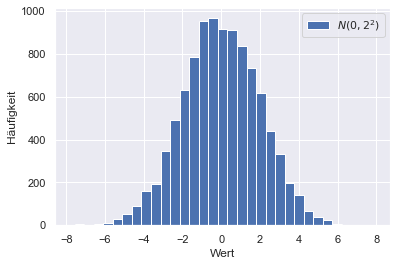

In [10]:
n_draws = 10000
sample = Zufallspunkt.draw(n_draws)

plt.hist(sample, bins = int(1 + 3.3*np.log(n_draws)))
plt.xlabel("Wert")
plt.xlim(min(sample) - 1, max(sample) + 1)
plt.ylabel("Häufigkeit")
plt.legend([f"$N({Zufallspunkt.mu},{Zufallspunkt.sigma}^2)$"]);

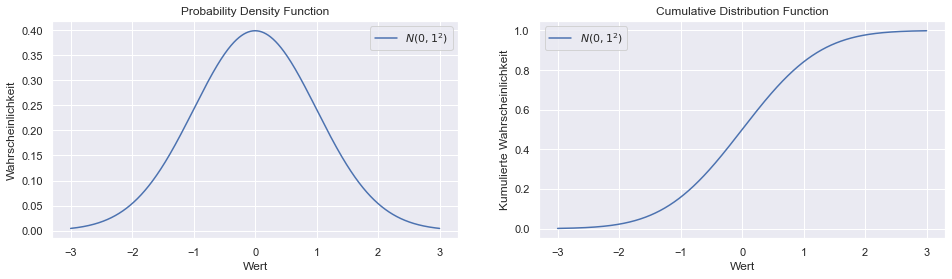

In [30]:
from scipy.stats import norm

mu = 0
sigma = 1

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)

plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
y_pdf = norm.pdf(x, mu, sigma)
plt.plot(x, y_pdf, label = f"$N({mu},{sigma}^2)$")
plt.ylabel("Wahrscheinlichkeit")
plt.xlabel("Wert")
plt.title("Probability Density Function")
plt.legend();

plt.subplot(1, 2, 2)
y_cdf = norm.cdf(x, mu, sigma)
plt.plot(x, y_cdf, label = f"$N({mu},{sigma}^2)$")
plt.ylabel("Kumulierte Wahrscheinlichkeit")
plt.xlabel("Wert")
plt.title("Cumulative Distribution Function")
plt.legend();

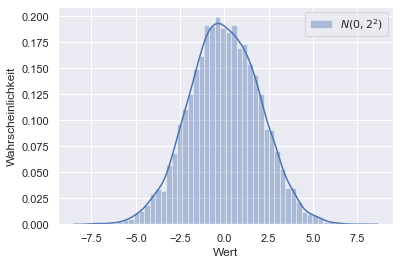

In [13]:
sns.distplot(sample)
plt.xlabel("Wert")
plt.ylabel("Wahrscheinlichkeit")
plt.legend([f"$N({Zufallspunkt.mu},{Zufallspunkt.sigma}^2)$"]);

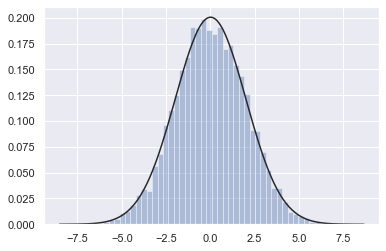

In [14]:
sns.distplot(sample, fit = norm, kde = False);

In [15]:
mu, sigma = norm.fit(sample)
print(f"loc = {mu}, scale = {sigma}")

loc = 0.0065752920818645645, scale = 1.9895517096586772


In [16]:
x = np.linspace(min(sample) - 1, max(sample) + 1, 100)
pdf = norm.pdf(x, loc = mu, scale = sigma)
cdf = norm.cdf(x, loc = mu, scale = sigma)

cdf_ = np.linspace(start = 0, stop = 1, num = 100)
x_ = norm.ppf(cdf_, loc = mu, scale = sigma)

In [17]:
cdf_1 = norm.cdf(1, loc = mu, scale = sigma)
cdf_1

0.6912233256374806

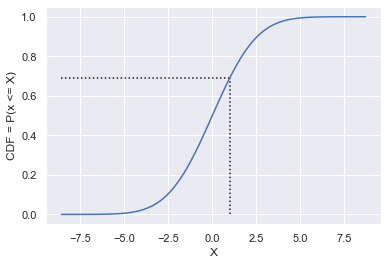

In [18]:
plt.plot(x, cdf)
plt.vlines(1, 0, cdf_1, linestyle = ":")
plt.hlines(cdf_1, min(sample) - 1, 1, linestyle = ":")
plt.xlabel("X")
plt.ylabel("CDF = P(x <= X)");

In [20]:
x_99 = norm.ppf(0.99, loc = mu, scale = sigma)
x_99

4.634964682140648

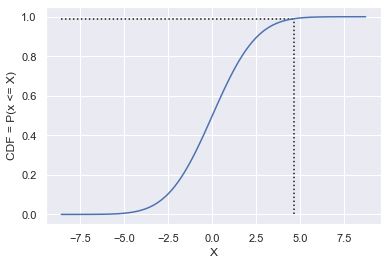

In [21]:
plt.plot(x, cdf)
plt.hlines(.99, min(sample)-1, x_99, linestyle = ":")
plt.vlines(x_99, 0, .99, linestyle = ":")
plt.xlabel("X")
plt.ylabel("CDF = P(x <= X)");

In [25]:
class ExponentialRandomVariable:
    def __init__(self, rate):
        self.rate = rate
        
    def draw(self, n_samples):
        samples =  np.random.exponential(self.rate, n_samples)
        return samples

In [26]:
Zufallspunkt = ExponentialRandomVariable(3)
Zufallspunkt.draw(10)

array([6.2199225 , 2.1071387 , 7.46718227, 3.69254059, 2.67883541,
       2.07431586, 0.97575521, 3.49634806, 1.3257603 , 3.31733738])

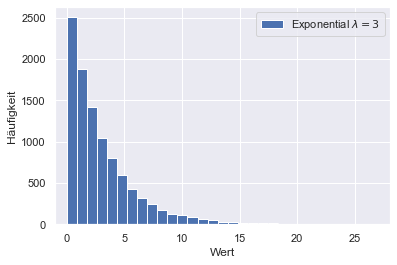

In [27]:
n_draws = 10000
sample = Zufallspunkt.draw(n_draws)
plt.hist(sample, bins = int(1 + 3.3*np.log(n_draws)))
plt.xlabel("Wert")
plt.xlim(min(sample) - 1, max(sample) + 1)
plt.ylabel("Häufigkeit")
plt.legend([f"Exponential $\lambda={Zufallspunkt.rate}$"]);

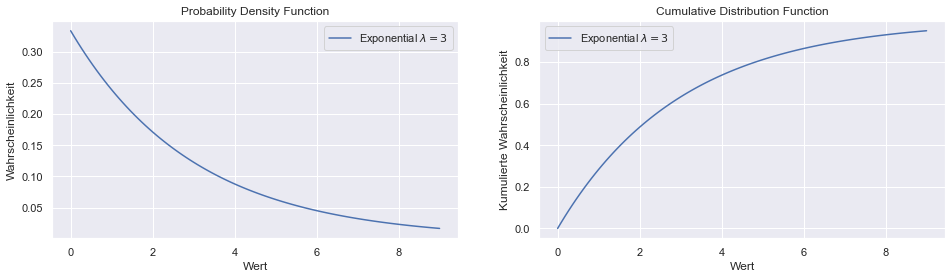

In [54]:
from scipy.stats import expon

rate = 3

plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
x = np.linspace(0, rate*3, 100)
y_pdf = expon.pdf(x, scale = rate)
plt.plot(x, y_pdf, label = f"Exponential $\lambda={rate}$")
plt.ylabel("Wahrscheinlichkeit")
plt.xlabel("Wert")
plt.title("Probability Density Function")
plt.legend();

plt.subplot(1, 2, 2)
y_cdf = expon.cdf(x, scale = rate)
plt.plot(x, y_cdf, label = f"Exponential $\lambda={rate}$")
plt.ylabel("Kumulierte Wahrscheinlichkeit")
plt.xlabel("Wert")
plt.title("Cumulative Distribution Function")
plt.legend();

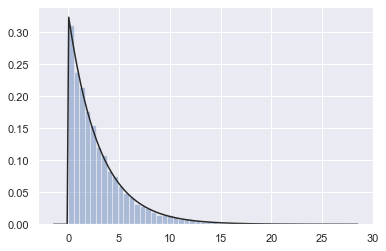

In [62]:
sns.distplot(sample, fit = expon, kde = False);

In [65]:
loc, rate = expon.fit(sample)
print(f"lambda = {rate}")

lambda = 3.0409059050141933


In [67]:
x = np.linspace(min(sample) - 1, max(sample) + 1, 100)
pdf = expon.pdf(x, loc = loc, scale = rate)
cdf = expon.cdf(x, loc = loc, scale = rate)

cdf_ = np.linspace(start = 0, stop = 1, num = 100)
x_ = expon.ppf(cdf_, loc = loc, scale = rate)

In [69]:
cdf_1 = expon.cdf(1, loc = loc, scale = rate)
cdf_1

0.280213188746687

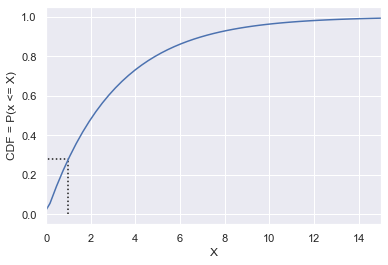

In [71]:
plt.plot(x, cdf)
plt.vlines(1, 0, cdf_1, linestyle = ":")
plt.hlines(cdf_1, min(sample) - 1, 1, linestyle = ":")
plt.xlim(0, 15)
plt.xlabel("X")
plt.ylabel("CDF = P(x <= X)");

In [72]:
x_99 = expon.ppf(0.99, loc = loc, scale = rate)
x_99

14.004038723263601

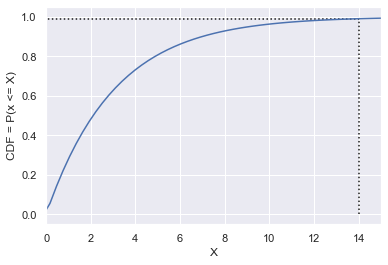

In [74]:
plt.plot(x, cdf)
plt.hlines(.99, min(sample)-1, x_99, linestyle = ":")
plt.vlines(x_99, 0, .99, linestyle = ":")
plt.xlim(0, 15)
plt.xlabel("X")
plt.ylabel("CDF = P(x <= X)");